In [1]:
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
data_y = pd.DataFrame(iris.target)
data_y.columns=['origianl_label']

In [4]:
data_X = pd.DataFrame(iris.data)
data_X.columns=['Sepal length','Sepal width','Petal length','Petal width']

In [5]:
train = pd.concat([data_X,data_y],axis=1)

In [6]:
train.head()

,Sepal length,Sepal width,Petal length,Petal width,origianl_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


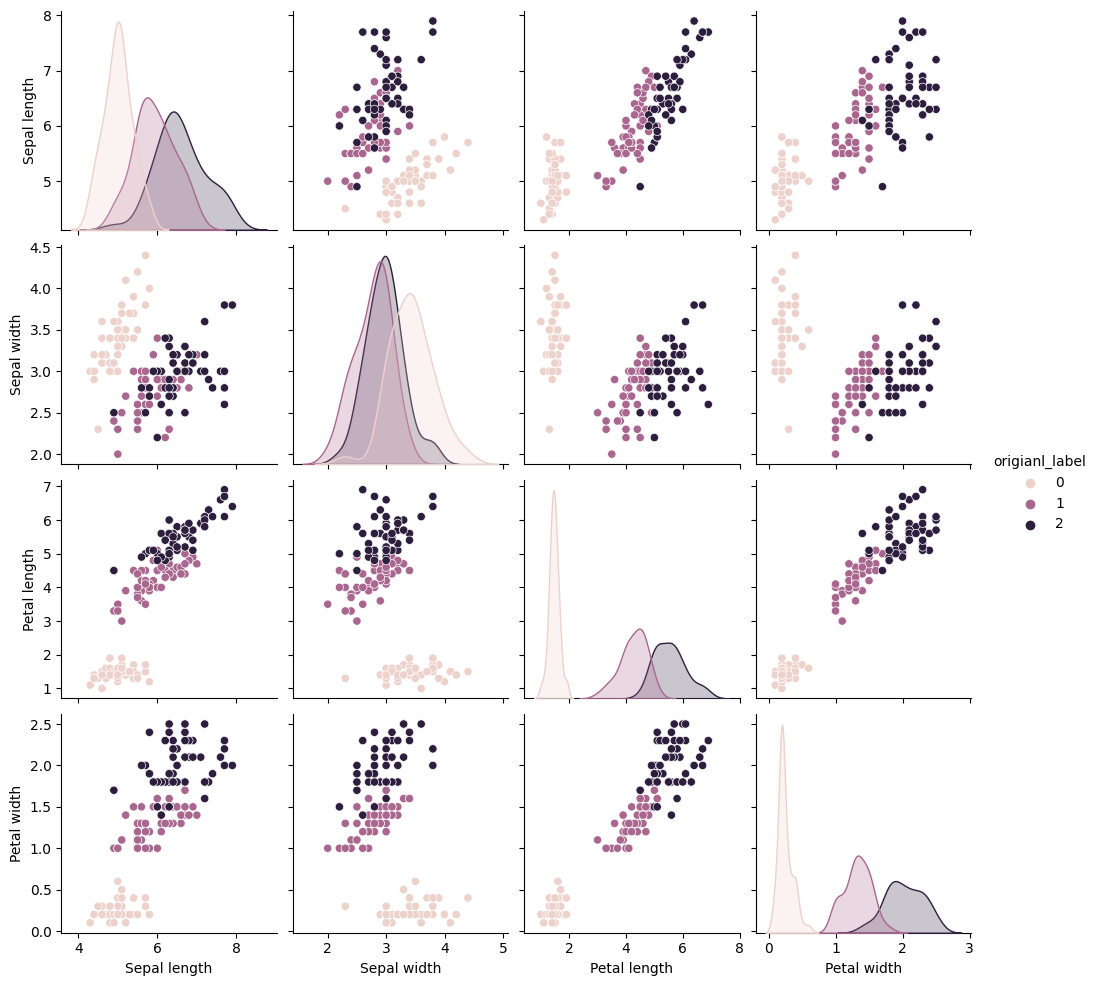

In [7]:
sns.color_palette("pastel")
sns.pairplot(train,hue='origianl_label')
plt.show()

# Splitting Data

In [8]:
TRAIN_LABEL_COL = "origianl_label"
TRAIN_FEATURES = [col for col in train.columns if col != TRAIN_LABEL_COL]
X = train[TRAIN_FEATURES]
y = train[TRAIN_LABEL_COL]

In [9]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred = dbscan.fit_predict(X)

In [10]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [12]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [14]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']

val = pd.concat([X,y_pred_df],axis=1)
print(val)

     Sepal length  Sepal width  Petal length  Petal width  pred_label
0             5.1          3.5           1.4          0.2           0
1             4.9          3.0           1.4          0.2           0
2             4.7          3.2           1.3          0.2           0
3             4.6          3.1           1.5          0.2           0
4             5.0          3.6           1.4          0.2           0
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3           1
146           6.3          2.5           5.0          1.9           1
147           6.5          3.0           5.2          2.0           1
148           6.2          3.4           5.4          2.3           1
149           5.9          3.0           5.1          1.8           1

[150 rows x 5 columns]


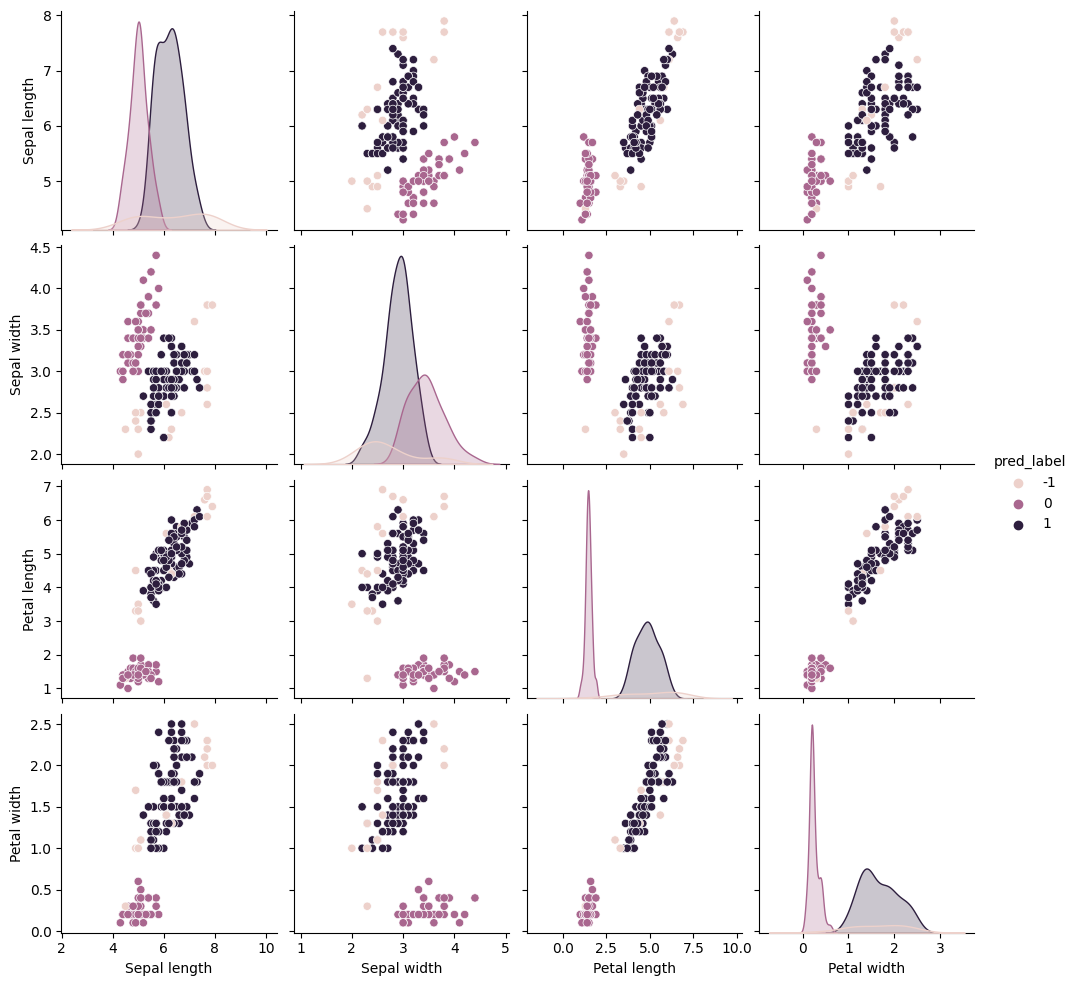

In [15]:
sns.color_palette("pastel")
sns.pairplot(val,hue='pred_label')
plt.show()